In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('new_data_imputed.csv')

In [3]:
df.head()

,Primary key,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,...,txn_81,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43,opening_year,opening_month,opening_day
0,1,0,1,53.0,3.0,2,101.0,0,1,0,...,1.0,1,0,0,1,1,1,2023,2,18
1,2,0,1,55.0,1.0,1,101.0,1,2,0,...,28.0,1,0,1,1,1,2,2023,2,1
2,3,0,1,55.0,3.0,1,101.0,2,1,0,...,48.0,1,0,2,1,1,2,2022,12,9
3,4,0,1,53.0,3.0,2,101.0,3,1,0,...,10.0,1,0,1,1,1,2,2023,3,31
4,5,0,1,55.0,6.0,1,101.0,1,3,0,...,23.0,1,0,0,1,1,1,2023,1,17


In [4]:
df.drop(['Primary key'], axis=1, inplace=True)
X = df.drop(columns=['Target'])  
y = df['Target']  

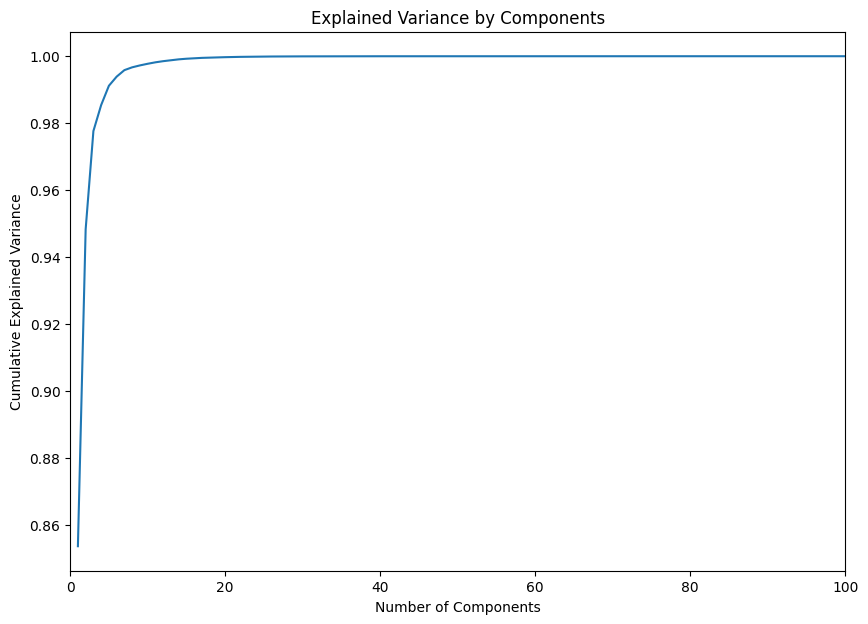

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 100)
plt.title('Explained Variance by Components')
plt.show()

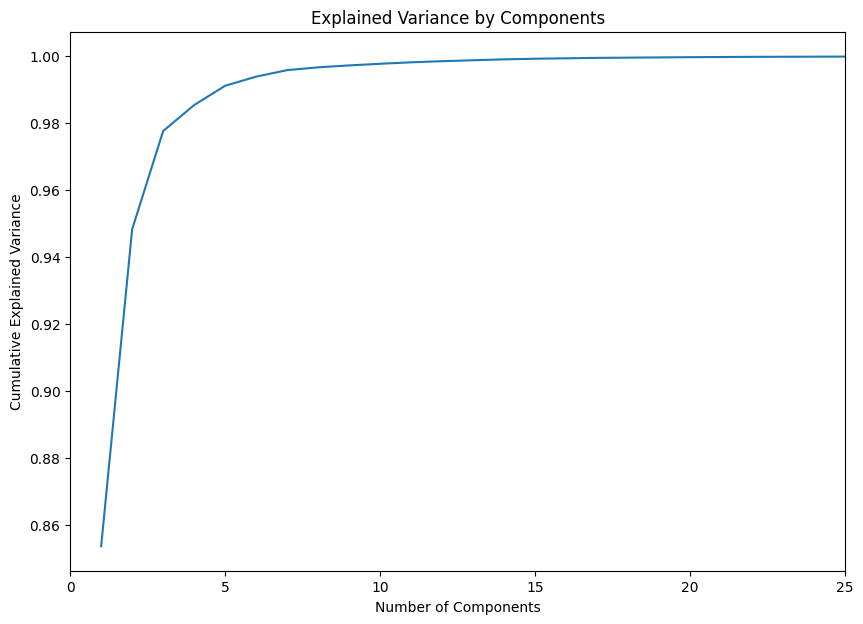

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 25)
plt.title('Explained Variance by Components')
plt.show()

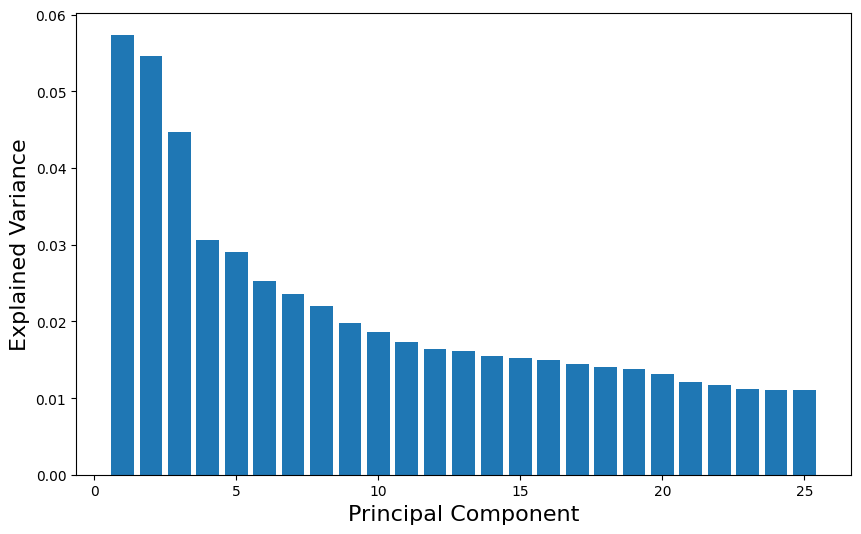

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# X = feature matrix with shape (n_samples, n_features)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=25) 

pca.fit(X_scaled)
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component', fontsize=16)
plt.ylabel('Explained Variance', fontsize=16)
plt.show()

sum = np.sum(pca.explained_variance_ratio_)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X = X_pca

In [9]:
X_pca.shape

(100000, 25)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best Params: {'max_depth': 6, 'min_samples_leaf': 6}
Best Score: 0.9918125
Best Estimator: DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)
Accuracy: 0.99125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.78      0.75      0.77       386

    accuracy                           0.99     20000
   macro avg       0.89      0.87      0.88     20000
weighted avg       0.99      0.99      0.99     20000

[[19534    80]
 [   95   291]]
Precision: 0.784366576819407
Weighted Precision: 0.9910919047660244
Recall: 0.7538860103626943
Weighted Recall: 0.99125
F1 Score: 0.7688243064729194
Weighted F1 Score: 0.99125


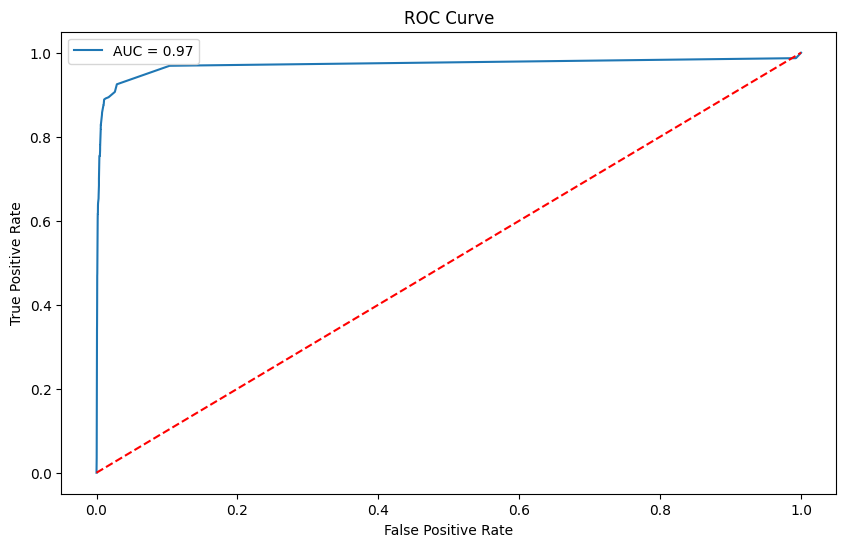

In [11]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)

# Grid Search
params = {'max_depth': np.arange(1, 10), 'min_samples_leaf': np.arange(1, 10)}
gs = GridSearchCV(dt, params, cv=5)
gs.fit(X_train, y_train)
print('Best Params:', gs.best_params_)
print('Best Score:', gs.best_score_)
print('Best Estimator:', gs.best_estimator_)
y_pred = gs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1 Score
print('Precision:', precision_score(y_test, y_pred))
print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred))
print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred))
print('Weighted F1 Score:', recall_score(y_test, y_pred, average='weighted'))

# ROC AUC
y_pred_prob = gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

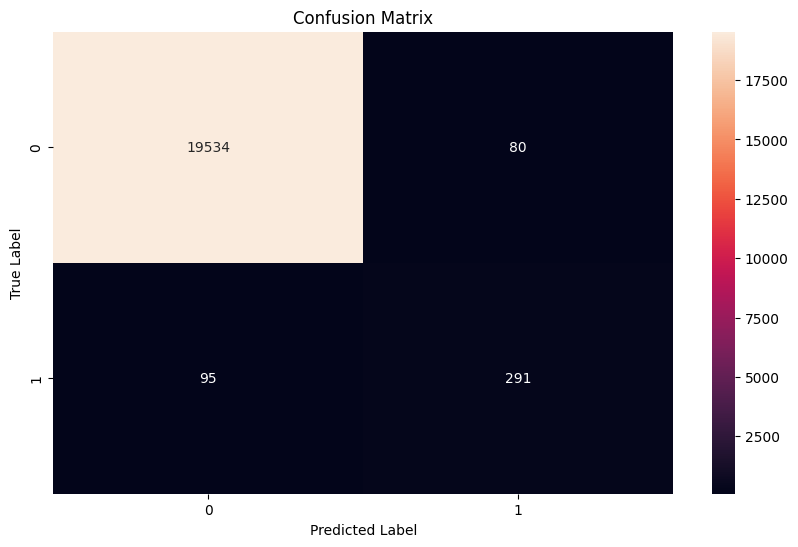

In [12]:
# Make the confusion matrix more visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best Params: {'C': 10}
Best Score: 0.9887625
Best Estimator: LogisticRegression(C=10, random_state=42)
Accuracy: 0.98885
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19614
           1       0.74      0.65      0.69       386

    accuracy                           0.99     20000
   macro avg       0.87      0.82      0.84     20000
weighted avg       0.99      0.99      0.99     20000

[[19528    86]
 [  137   249]]
Precision: 0.7432835820895523
Weighted Precision: 0.9882131381991643
Recall: 0.6450777202072538
Weighted Recall: 0.98885
F1 Score: 0.6907073509015257
Weighted F1 Score: 0.98885


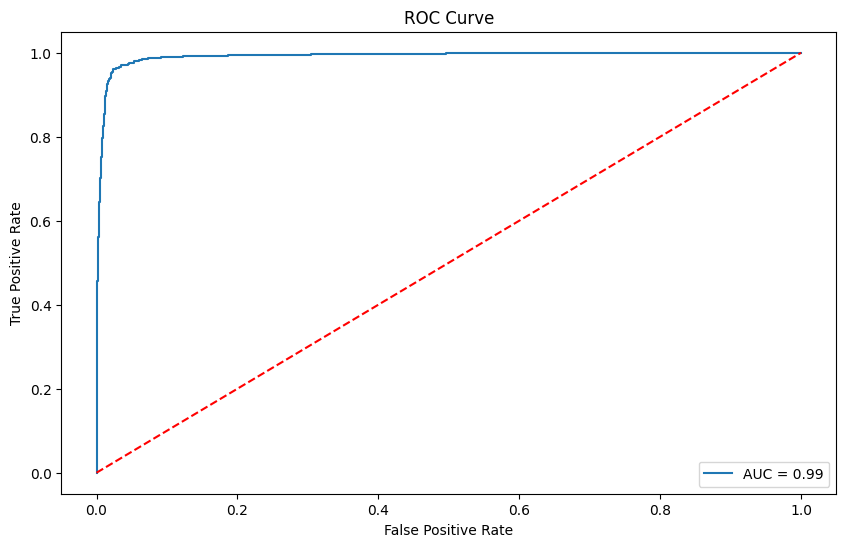

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

# Grid Search
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs = GridSearchCV(lr, params, cv=5)
gs.fit(X_train, y_train)
print('Best Params:', gs.best_params_)
print('Best Score:', gs.best_score_)
print('Best Estimator:', gs.best_estimator_)
y_pred = gs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1 Score
print('Precision:', precision_score(y_test, y_pred))
print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred))
print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred))
print('Weighted F1 Score:', recall_score(y_test, y_pred, average='weighted'))

# ROC AUC
y_pred_prob = gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

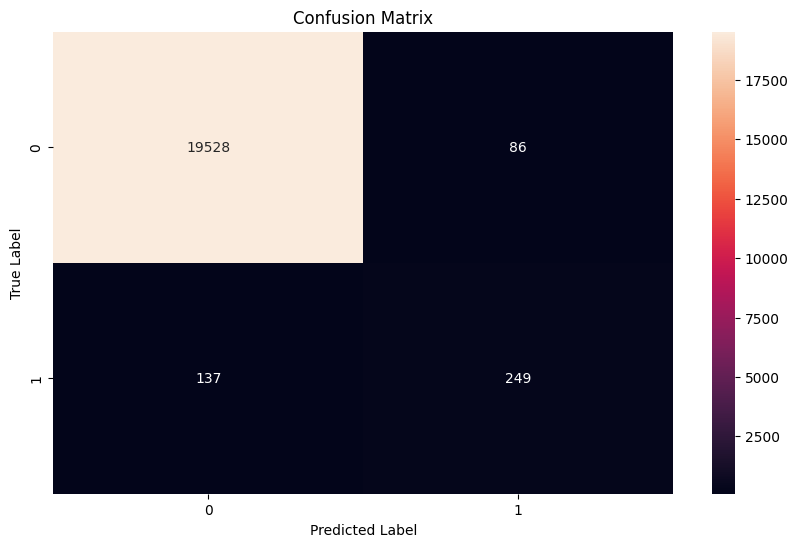

In [14]:
# Make the confusion matrix more visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best Params: {'n_neighbors': 7}
Best Score: 0.9923249999999999
Best Estimator: KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.993
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19614
           1       0.88      0.74      0.80       386

    accuracy                           0.99     20000
   macro avg       0.93      0.87      0.90     20000
weighted avg       0.99      0.99      0.99     20000

[[19573    41]
 [   99   287]]
Precision: 0.875
Weighted Precision: 0.9926520943472957
Recall: 0.7435233160621761
Weighted Recall: 0.993
F1 Score: 0.803921568627451
Weighted F1 Score: 0.993


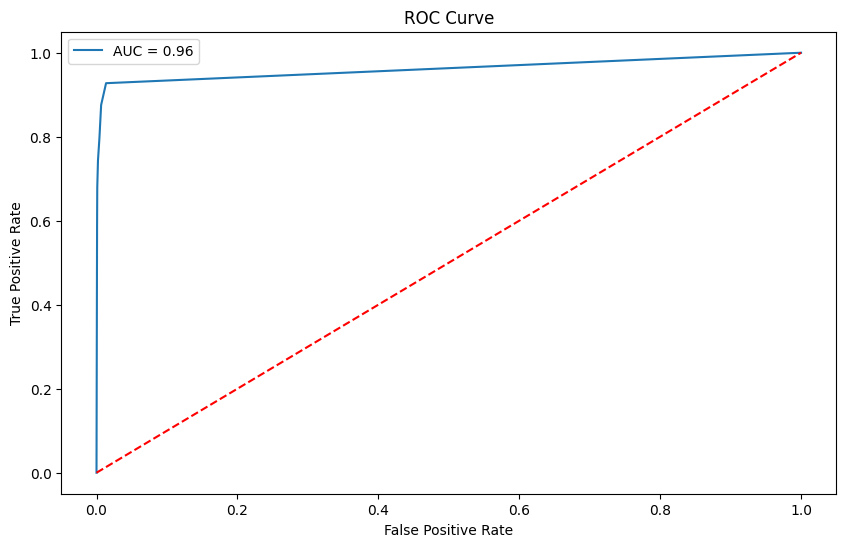

In [15]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Grid Search
params = {'n_neighbors': np.arange(1, 10)}
gs = GridSearchCV(knn, params, cv=5)
gs.fit(X_train, y_train)
print('Best Params:', gs.best_params_)
print('Best Score:', gs.best_score_)
print('Best Estimator:', gs.best_estimator_)
y_pred = gs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1 Score
print('Precision:', precision_score(y_test, y_pred))
print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred))
print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred))
print('Weighted F1 Score:', recall_score(y_test, y_pred, average='weighted'))

# ROC AUC
y_pred_prob = gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

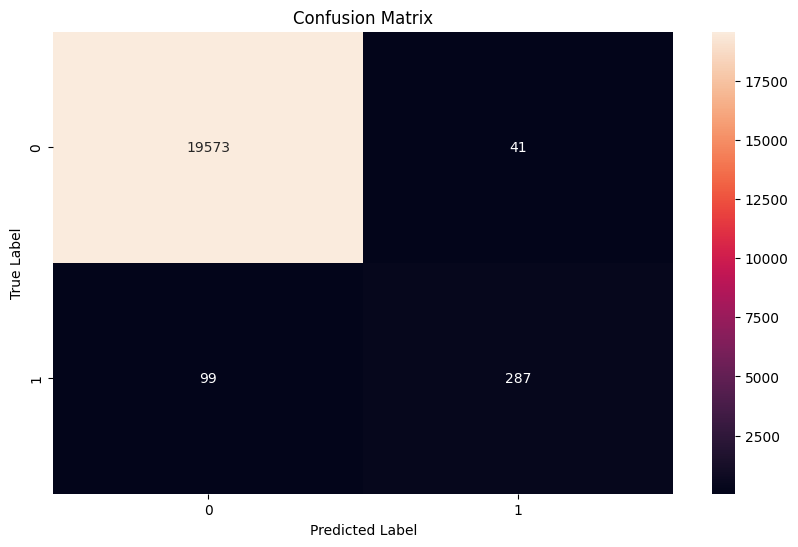

In [16]:
# Make the confusion matrix more visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best Params: {'max_depth': 8, 'n_estimators': 200}
Best Score: 0.9939375
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.99405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.89      0.7

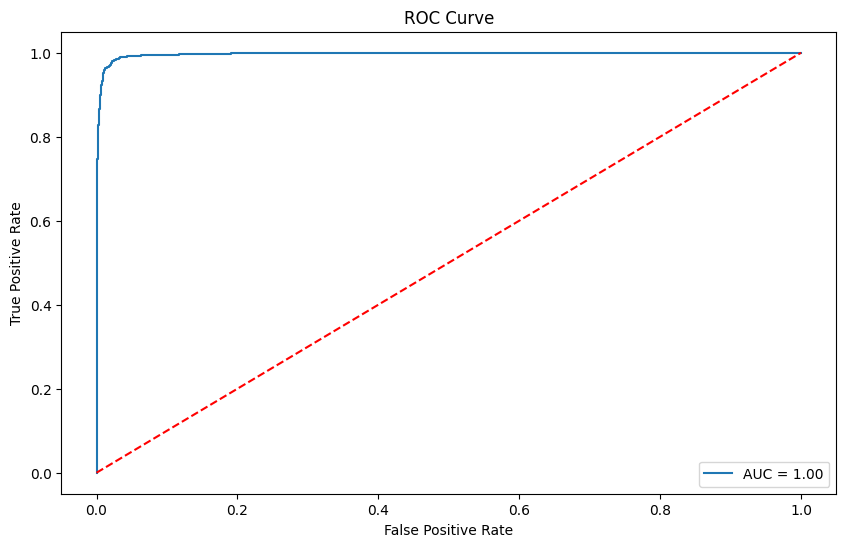

In [22]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
gs = GridSearchCV(xgb, {'max_depth': [4, 6, 8], 'n_estimators': [50, 100, 200]}, cv=5)
gs.fit(X_train, y_train)
print('Best Params:', gs.best_params_)
print('Best Score:', gs.best_score_)
print('Best Estimator:', gs.best_estimator_)
y_pred = gs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1 Score
print('Precision:', precision_score(y_test, y_pred))
print('Weighted Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred))
print('Weighted Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred))
print('Weighted F1 Score:', recall_score(y_test, y_pred, average='weighted'))

# ROC AUC
y_pred_prob = gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

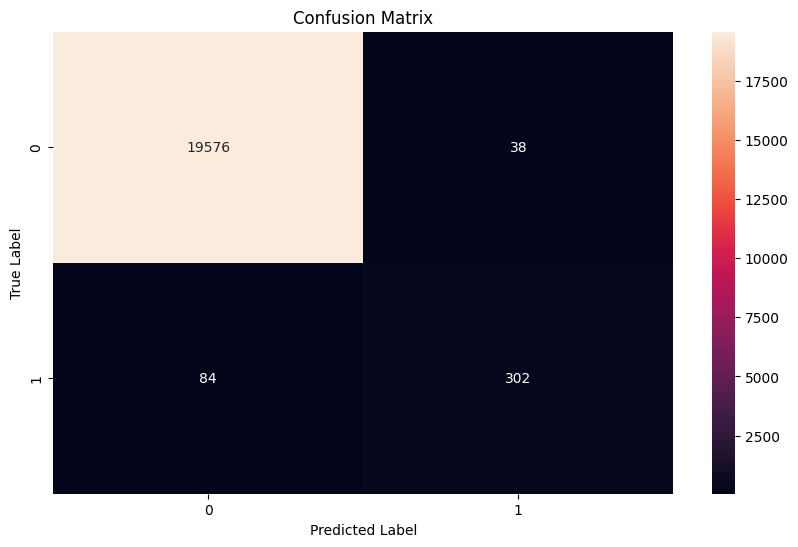

In [21]:
# Make the confusion matrix more visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()